In [8]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("fgsea")

In [110]:
library(fgsea)
library(dplyr)

In [111]:
GO_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/msigdb.v7.4.symbols.gmt.txt"
myGO = fgsea::gmtPathways(GO_file)

In [3]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_20pct_cluster_labels.csv"
df_clusters = read.csv(filename, row.names = 1)

In [4]:
head(df_clusters[,c("label","gene")],2)

,label,gene
0,12,ENSG00000005059_CCDC109B_-4_110648632_T_A
1,6,ENSG00000006016_CRLF1_-19_18735221_G_T


In [5]:
# load cluster summaries
cluster_summaries = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_20pct_cluster_summaries.csv", row.names=1)
colnames(cluster_summaries) = paste0("cluster",0:16)
head(cluster_summaries,2)

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16
21241_6#101,0.1680083,1.467499,-0.04738185,-1.1890982,-0.44598433,-0.3017349,0.6407952,1.6552159,-1.909218,0.9298816,-0.007411288,-0.5327193,0.3091328,-0.9619672,0.5665350,-0.8121361,-0.72275553
21241_6#109,-0.1129149,1.231645,-1.02890629,-0.8263663,-0.04170535,0.6850877,-0.4509523,0.1248104,-1.776294,0.9899942,0.457897144,-0.4169017,-0.1743749,-1.3186190,0.6201114,-0.8507167,-0.08365583


In [6]:
###################################################### 
### approach 1: enrichment of genes (eQTL) in the clusters

In [7]:
## load individual eQTL genetic effects
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
colnames(df) = gsub("\\.","-",colnames(df))
head(df,2)
nrow(df)

,ENSG00000005059_CCDC109B_-4_110648632_T_A,ENSG00000006016_CRLF1_-19_18735221_G_T,ENSG00000006459_KDM7A_-7_139913409_G_A,ENSG00000013297_CLDN11_-3_170402765_T_C,ENSG00000021300_PLEKHB1_-11_73339784_G_A,ENSG00000029639_TFB1M_-6_155635808_C_G,ENSG00000033178_UBA6_-4_68480525_C_T,ENSG00000035115_SH3YL1_-2_256116_G_T,ENSG00000059377_TBXAS1_-7_139547370_G_A,ENSG00000063761_ADCK1_-14_78311319_G_A,...,ENSG00000248098_BCKDHA_-19_41937095_G_A,ENSG00000248124_RRN3P1_-16_21818292_A_C,ENSG00000250317_SMIM20_-4_25918516_A_G,ENSG00000253203_GUSBP3_-5_68922087_T_G,ENSG00000254184_TYW1B_-7_72200923_G_A,ENSG00000256018_HIST1H3G_-6_26198845_G_C,ENSG00000256073_C21orf119_-21_33728588_C_A,ENSG00000259024_TVP23C-CDRT4_-17_15434991_C_T,ENSG00000259803_SLC22A31_-16_89234110_G_C,ENSG00000267323_SLC25A1P5_-19_28298186_T_C
21843_1#10,-0.02336156,0.037167263,-0.02962768,0.1829698,-0.03793941,-0.02932441,0.03139850,-0.03962300,0.08013833,0.02749838,...,-0.08185803,-0.1086237,-0.10317566,-0.04854321,0.095111678,-0.002571070,-0.05560833,0.1931245,-0.06168149,0.05468625
21843_1#100,-0.04797379,-0.002567715,-0.05030368,0.1420454,-0.06425603,-0.01789411,-0.06468377,-0.08820444,0.23273882,0.04037590,...,-0.16133495,-0.4557181,-0.09858982,-0.09564130,0.007662211,-0.001386594,-0.09411877,0.2614240,-0.16271379,-0.03705185


[1] 33964

In [138]:
cluster = 14
gene_list = c()
genes = df_clusters[df_clusters$label==cluster,"gene"]
for (gene in genes){
    gene_list = c(gene_list, cor(df[rownames(cluster_summaries),gene], cluster_summaries[,cluster+1]))
}
names(gene_list) = genes
gene_list = gene_list[order(gene_list, decreasing=T)]
gene_list

ENSG00000115648_MLPH_-2_238402830_G_A 
                               0.9386005 
ENSG00000110931_CAMKK2_-12_121680460_G_C 
                               0.9182974 
 ENSG00000187097_ENTPD5_-14_74328905_G_T 
                               0.9182022 
  ENSG00000099984_GSTT2_-22_24323514_C_T 
                               0.8412372 
   ENSG00000156049_GNA14_-9_80149918_G_A 
                               0.8311545 
   ENSG00000183735_TBK1_-12_64759820_A_G 
                               0.6462861

In [139]:
## for gprofiler https://biit.cs.ut.ee/gprofiler/gost

In [140]:
# cluster 14
noquote(gsub(".*_","",gsub("_-.*","",names(gene_list))))

[1] MLPH   CAMKK2 ENTPD5 GSTT2  GNA14  TBK1  

In [137]:
# cluster 4
noquote(gsub(".*_","",gsub("_-.*","",names(gene_list))))

 [1] ARHGAP11A      TYW1B          ZNHIT3         POMZP3         CCDC58        
 [6] XAB2           SLC25A1P5      VAMP4          ZNF816-ZNF321P GPR137B       
[11] FBP1           DECR2          SNRNP27        DISP1         

In [134]:
# cluster 1
noquote(gsub(".*_","",gsub("_-.*","",names(gene_list))))

 [1] PELP1    WBSCR27  MACROD2  PMS2P5   GIGYF1   RAB6A    REEP3    CSNK2B  
 [9] SYT3     APOBEC3B WBSCR16  RFTN1    LTC4S    HEXIM1   HLA-C    TMEM101 
[17] SEMA4C   HSPA1A  

In [130]:
# cluster 12
noquote(gsub(".*_","",gsub("_-.*","",names(gene_list))))

 [1] SLC9A3R1  MATN3     ZDHHC2    THNSL2    ANKS1B    CLGN      VWDE     
 [8] SLC2A14   IFI27     GSDMD     SLC25A24  ACKR3     NANOG     SH3YL1   
[15] GTF2A2    PTGR1     C21orf119 NQO2      RBFA      IFI16     KLKB1    
[22] CCDC109B  CRELD1    ZNF461    SAR1A     SLC22A31  TTC32     SNX25    

In [127]:
# cluster 16
noquote(gsub(".*_","",gsub("_-.*","",names(gene_list))))

 [1] CHST4    DIS3L    GLRX     USP18    CRHBP    CDC42EP3 ZNF726   TMEM38B 
 [9] EPT1     NEK3     MYOCD    RCAN3    SLC2A8   ST6GAL2  SPIRE1   NTS     
[17] CST1     MCM8     NKD2     GLIPR1L1 SP8      C6orf57  PEX6     RBCK1   
[25] BLOC1S3  KALRN    PRAC1    HIST1H3B ITGB3BP  DPYSL4   FAM86B3P

In [124]:
# cluster 3
noquote(gsub(".*_","",gsub("_-.*","",names(gene_list))))

 [1] GMCL1      NAAA       TMEM177    DNAJC18    PPIP5K2    PALLD     
 [7] ABHD6      COL6A2     SRR        PTGR2      SLC16A9    ADCK1     
[13] ULK4       AEN        KCNK1      SLC5A9     UPK1B      GGT1      
[19] YEATS4     ZNF69      VASH2      TDP2       SCAMP5     STARD5    
[25] ZNF738     SLFN12     ST6GALNAC3 METAP2     RAD51C     GPM6A     
[31] TBXAS1     SNRNP25    MT1G       ELP5       FLOT1     

In [121]:
# cluster 9
noquote(gsub(".*_","",gsub("_-.*","",names(gene_list))))

 [1] TMEM50B   TFB1M     PELI1     LYPD2     FBLN1     C2orf40   AURKC    
 [8] CNTNAP2   SORL1     TUBBP5    FAM26F    HTR7      C8orf31   DYDC2    
[15] RPS26     LHFP      AHSP      UPK3B     DUSP16    SURF2     NSUN5    
[22] SMIM20    DNAJC15   ADD2      FN1       ATG10     KDM7A     BCKDHA   
[29] ALCAM     TTC23     CBWD1     PROCR     FAH       IFITM3    CECR1    
[36] POU5F1    GUSBP3    FAM118A   C19orf33  NIPAL1    ARHGAP24  ZDHHC19  
[43] CCHCR1    PLAGL1    SPP1      NME7      CRHR1-IT1 S1PR3     DUS3L    
[50] CENPU     LRRC69    PXK       C14orf119 TMED8     COBLL1    SBDSP1   
[57] ASRGL1    CTBS      GRID2    

In [118]:
# cluster 13
noquote(gsub(".*_","",gsub("_-.*","",names(gene_list))))

 [1] UCKL1        C21orf88     LIMCH1       RRN3P1       IER3        
 [6] DHDH         CRYGEP       SERPINF1     KDR          COA6        
[11] CHST13       BST2         PPAPDC1A     HLA-DQB1     C9orf135    
[16] ACTA1        CLDN11       CRYGD        TRBC2        CPSF1P1     
[21] SH3BGR       TDRD7        CDRT4        RIPK4        FAM65B      
[26] CD59         SCG5         TVP23C-CDRT4 CASP6        SPTSSB      
[31] TMEM64       MRPL28       NANOGP1      S1PR1        DNAAF3      
[36] RHOC         TVP23C       KRT7         STEAP2       GLB1L2      
[41] PRKCQ        RAB17        C20orf96     CYBRD1       APOBEC3F    
[46] TGFB1I1      CUL4A        RHOD         PLA2G4C      STEAP1B     
[51] RNF2P1       TNNI3        CD151        ZNF749       SPINK5      
[56] HES6         GSTT2B       LAPTM4A      PLEKHB1      MLLT3       
[61] PLAU         PSPHP1       PLAC9        LRRC37A4P    RWDD2B      
[66] CRYBB2P1    

In [57]:
fgRes <- fgsea::fgsea(pathways = myGO, 
                           stats = gene_list1,
#                            minSize=15,
#                            maxSize=600,
                           nperm=10000) %>% 
                  as.data.frame() %>% 
                  dplyr::filter(padj < !!1)

In [58]:
fgRes

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge


In [ ]:
##########################################################################################
### approach 2: enrichment of genes correlated with each clusters (using the cluster summaries)

In [141]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/"
# Phenotype
phenotype_file = paste0(input_files_dir,"phenotype.csv")

In [ ]:
# df0 = read.csv(phenotype_file, row.names=1)
# colnames(df0) = gsub("\\.","#",colnames(df0))
# colnames(df0) = sub(".","",colnames(df0))
df0[1:5,1:5]

In [159]:
df1 = df0[,rownames(cluster_summaries)]
ncol(df0)
ncol(df1)
df1[1:5,1:5]

[1] 34256

[1] 6784

,21241_6#101,21241_6#109,21241_6#112,21241_6#12,21241_6#123
ENSG00000000003_TSPAN6,3.8440581,5.6471515,6.112655,5.02743109,5.99644794
ENSG00000000419_DPM1,6.0441420,6.0754514,7.272333,5.70471002,5.43597484
ENSG00000000457_SCYL3,0.2319908,0.1760917,3.277097,0.03105648,4.06356923
ENSG00000000460_C1orf112,1.0123370,2.3431061,3.035646,1.64062578,0.01304527
ENSG00000001036_FUCA2,0.0000000,3.3033989,5.531081,3.11254960,0.00000000


In [160]:
genes = rownames(df1)
length(genes)
head(genes)

[1] 11231

[1] "ENSG00000000003_TSPAN6"   "ENSG00000000419_DPM1"    
[3] "ENSG00000000457_SCYL3"    "ENSG00000000460_C1orf112"
[5] "ENSG00000001036_FUCA2"    "ENSG00000001084_GCLC"

In [166]:
cluster = 13
gene_list = c()
for (gene in genes){
    gene_list = c(gene_list, cor(as.numeric(df1[gene,]), cluster_summaries[,cluster+1]))
}
names(gene_list) = genes
gene_list = gene_list[order(gene_list, decreasing=T)]

In [186]:
head(gene_list)

ENSG00000136110_LECT1  ENSG00000163032_VSNL1 ENSG00000113356_POLR3G 
             0.8334986              0.8265891              0.7902008 
 ENSG00000136014_USP44 ENSG00000167600_CYP2S1   ENSG00000104112_SCG3 
             0.7884952              0.7872967              0.7665190

In [183]:
genes_13_pos = gene_list[gene_list>0.5]
genes_13_neg = gene_list[gene_list<(-0.5)]
genes_13_neg = genes_13_neg[order(genes_13_neg)]

In [174]:
# hist(gene_list)

In [182]:
cat(noquote(gsub(".*_","",names(genes_13_pos))))

LECT1 VSNL1 POLR3G USP44 CYP2S1 SCG3 PHC1 THY1 LCK SOX2 NANOG CKMT1B PHC1P1 GLB1L3 CDH1 CDH3 SFRP2 VASH2 TERF1 CAMKV TRBC2 EPCAM CKMT1A DPPA4 NMRK2 PDPN ZSCAN10 CLDN7 ZDHHC22 SLC7A8 CLDN10 IDO1 CLU FAM46B CYB5A OLFML3 SLC29A1 VAT1L SEMA6A PMEL GPR160 PEBP1 SCG5 CD9 ADD2 PPAP2C GDPD2 AP1M2 SMPDL3B PTPRZ1 CLDN4 RASGRP2 TFPI TMEM125 PYCARD AK4 B3GALT1 RARRES2 SPP1 HAPLN3 GPC3 C9orf135 ESRP1 SCNN1A L1TD1 CRIP3 RAMP2 ALPL FUT3 PDGFA RPL39L UBE2L6 NPM1 ERVMER34-1 HSPE1 MAD2L2 PLP1 ICA1 BTBD17 DHRS3 CDYL GRIA4 PPAP2B SYT6 MT1X HSPD1 JAKMIP2 COX7C GGCT SYT1 SLC2A1 ZFP42 SPTSSB ANKRD18CP SPINT1 TTYH1 LRRC16A RABGAP1L LAD1 TUBB4A ADM CRABP1 NANOGP8 SPIB ITGA6 PSIP1 CD74 C1orf210 TMEM55A UGP2 STOM HHLA1 RASL11B HMGN5 TKT PIM2 KRTCAP3 ATP1A2 ERVW-1 CDCA7L CTSC RBM47 TUBA4A BCAM TRIML2 GYLTL1B GULP1 IGSF1 SLIRP AIG1 GRB7 THYN1 PIP4K2A S100A4 KHK FABP3 SERPINF1 SAMHD1 PHGDH EDNRB PPM1H ACOXL GPR143 MAP2K6 RBFOX3 GFPT2 C1orf172 OAZ2 ARG2 TIMP4 MYCN PTMA SNCG JADE1 MGST1 ZNF589 NTM LDHB CDCP1 FAR2P2 N

In [184]:
cat(noquote(gsub(".*_","",names(genes_13_neg))))

CER1 GATA6 FGF17 CDH2 EOMES LEPREL1 POU2AF1 CYP26A1 RHOBTB3 APOBEC3G ROR2 LHX1 ITGA5 C1orf61 CNTNAP2 SERHL2 GSC PKM WLS SERPINE2 DLC1 SERPINB9 NFKBIA ENC1 H2AFY2 DYNC1I1 TMSB10 COL5A2 APOL6 ENPP7P8 VIM MAGEB17 COL13A1 LZTS1 PLXNA2 ADAM19 CFLAR ARL4D FREM1 ACOX3 SLCO2A1 MCF2L2 LRIG3 PLSCR1 GYPB BHLHE40 COL5A1 PCDH10 VAMP8 BEST3 EPHA2 OTX2 DUSP4 TRMT44 BMP2 CCDC81 NRP1 ZNF571 APLP2 KLF8 DDAH2 RHOC ST8SIA4 IFITM1 B4GALT4 LAPTM4B COL6A1 HAS2 CYP27A1 APOBEC3F JAKMIP1 MAP2K1 GATA4 NPC2 WBP5 FBLN1 CPE NTN4 BTG2 ANGPT2 ANXA6 ELMO1 FAM89A PPAPDC1A P4HA1 SOX17 GSTO1 FLRT3 MCC ZIC3 SLC46A3 TSKU LINC00888 PREX1 FBXO34 MIXL1 AGL ACSS3 CAMK2D CRIP1 TMOD1 GYPE MYL7 H1F0 NRP2 IL6ST NPPB PRDM1 MDK MYL12A HRG SMARCD3 FSCN1 NTN1 COL6A2 MAGED1 PPP1R15A TDRD7 GRP FBN2 FAM65A CHL1 MAGI3 SULF2

In [196]:
mat = matrix(0,nrow = length(genes), ncol = ncol(cluster_summaries))
rownames(mat) = genes
colnames(mat) = colnames(cluster_summaries)
for (cluster in 0:16){
    for (gene in genes){
        mat[gene,cluster+1] = cor(as.numeric(df1[gene,]), cluster_summaries[,cluster+1])
    }
}

In [197]:
df_mat = as.data.frame(mat)
head(df_mat)
write.csv(df_mat, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/gene_expression_correlation_cluster_summaries.csv")

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16
ENSG00000000003_TSPAN6,-0.03278743,-0.02595152,-0.019489200,0.20812960,0.17928511,-0.088145315,-0.040269599,-0.158662375,0.15397092,-0.22751871,-0.156336242,-0.07582469,-0.123315748,0.16045604,-0.036377457,-0.002197800,0.228378584
ENSG00000000419_DPM1,-0.08145661,-0.11340380,0.019654544,0.20310854,0.29530274,-0.079552321,0.021093978,-0.151843105,0.20247987,-0.20891601,-0.224050465,-0.14857201,-0.027481700,0.13360443,-0.011352074,0.019903492,0.183526454
ENSG00000000457_SCYL3,0.01138163,-0.01006154,0.003808672,0.01177544,0.03234050,-0.047882180,0.007956968,-0.001453939,0.03135984,-0.01929688,-0.008375386,-0.03011747,0.000307631,0.02226312,0.007341185,-0.010535033,0.004225529
ENSG00000000460_C1orf112,-0.02364342,-0.13402487,0.078225980,0.06275032,0.18055390,-0.049309400,0.016680058,-0.039126612,0.12964136,-0.06779328,-0.143645815,-0.09973966,0.053287117,0.06215576,0.005501806,0.004165092,0.025859535
ENSG00000001036_FUCA2,-0.22178467,-0.18145921,0.149194493,0.25267897,0.19711342,-0.007098826,0.256418349,-0.072815457,0.20619317,-0.28575780,0.044347077,0.01882798,-0.076504633,0.31591438,-0.251135733,0.212603173,-0.085116960
ENSG00000001084_GCLC,-0.04837921,-0.06994902,0.096400635,0.09821645,0.02199214,0.053369134,0.059449915,-0.008822399,0.02540003,-0.09170745,-0.055233689,0.09582720,-0.011069014,0.09428823,-0.118771810,0.092344802,-0.003718091


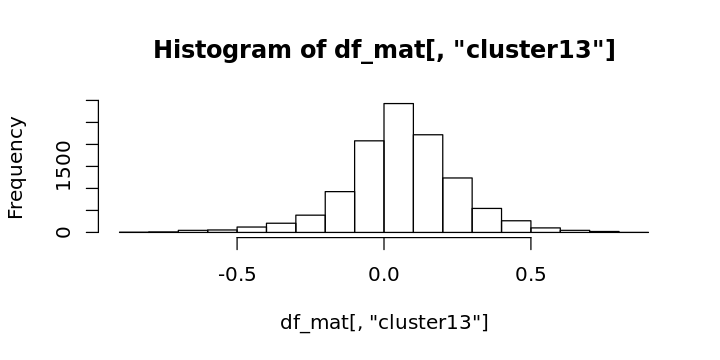

In [210]:
# 13, 9, 3, 16, 12, 1, 4, 6, 2, 7, 0, 11, 14, 10, 8, 5, 15
hist(df_mat[,"cluster13"])

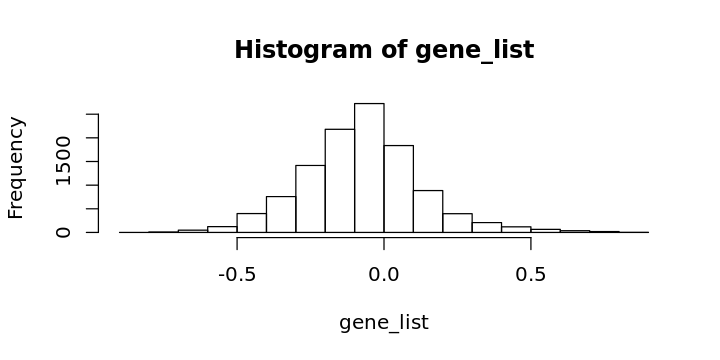

In [209]:
########### cluster 9
gene_list = df_mat[,"cluster9"]
names(gene_list) = rownames(df_mat)
options(repr.plot.width = 6, repr.plot.height = 3)
hist(gene_list)

In [204]:
genes_9_pos = gene_list[gene_list>0.5]
genes_9_neg = gene_list[gene_list<(-0.5)]
c(length(genes_9_pos), length(genes_9_neg))

[1] 124 183

In [205]:
genes_9_pos = genes_9_pos[order(genes_9_pos, decreasing = T)]
genes_9_neg = genes_9_neg[order(genes_9_neg)]

In [206]:
cat(noquote(gsub(".*_","",names(genes_9_pos))))

FGF17 CER1 RHOBTB3 GATA6 APOL6 APOBEC3G LEPREL1 POU2AF1 CYP26A1 CCDC81 CDH2 SERHL2 BEST3 EOMES FREM1 LHX1 MAGEB17 CNTNAP2 ROR2 CFLAR SERPINB9 TRMT44 DUSP4 ACOX3 COL5A2 GSC MCF2L2 SOX17 ARL4D TMSB10 ZNF571 IFITM1 KLF8 ITGA5 NFKBIA C1orf61 ENPP7P8 DLC1 PKM GYPB DYNC1I1 ADAM19 PLXNA2 OTX2 CPE ST8SIA4 B4GALT4 PLSCR1 CYP27A1 LAPTM4B LRIG3 PCDH10 PRDM1 VIM SLCO2A1 AGL H2AFY2 TDRD7 SEMA3E BTG2 COL13A1 APOBEC3F ENC1 CAMK2D GATA4 VAMP8 BMP2 CCKBR HAS2 MAP2K1 APLP2 LZTS1 NTN4 DDAH2 ANGPT2 ELMO1 CD99 SERPINE2 COL6A1 GATM MGST2 LINC00888 H1F0 WLS JAKMIP1 HRG MDK WBP5 ANXA6 DIO3 SMARCD3 RHOC OVCH2 COLEC12 MAGED1 GPSM2 PPAPDC1A COL5A1 COL6A2 PLSCR2 P4HA1 FBXO34 EPSTI1 S1PR3 SLC35A3 BNIP3 MYL7 ZIC3 FBLN1 TMOD1 EPHA2 TTC3 CRIP1 NPC2 NRP2 MAGED2 KCNK12 MRPL22 PIK3R5 FAM65A DACT2 BHLHE40 MCC SERPINB6

In [207]:
cat(noquote(gsub(".*_","",names(genes_9_neg))))

LECT1 POLR3G VSNL1 SCG3 SFRP2 THY1 CYP2S1 USP44 CKMT1B TERF1 PHC1 NPM1 CKMT1A GLB1L3 PDPN HSPD1 HSPE1 LCK CLU NANOG SOX2 PHC1P1 VASH2 CDH1 ZDHHC22 CAMKV CLDN10 NME1 SLC7A8 TRBC2 ERVMER34-1 ZSCAN10 PTMA MT1X DPPA4 RARRES2 NMRK2 PEBP1 ADD2 SEMA6A FABP5 LDHB ZFP42 CDH3 L1TD1 B3GALT1 OLFML3 C1QBP PTPRZ1 SLIRP CYB5A FAM46B PMEL MAD2L2 GGCT SPP1 SERBP1 VAT1L GPC3 GPR160 HAPLN3 CLDN7 NOP16 AP1M2 IDO1 SCG5 SMPDL3B SLC29A1 SLC2A1 COTL1 PYCARD TUBA4A ALPL PAK1IP1 CD9 GDPD2 TMEM125 MCM3 PAICS RASGRP2 EPCAM TMX1 HPRT1 EEF1E1 RAMP2 HMGN5 C9orf135 SCNN1A PDGFA TOMM5 CDCA7L SSBP1 TKT RAN CDYL UBE2L6 HSPA9 MCM4 PPAP2B PROM1 PMAIP1 ADM RSL1D1 CLDN4 CRIP3 HSP90AB1 AK4 UGP2 DCAF13 TIMM8A FAM64A PCNA PHGDH BTBD17 PPAP2C GULP1 CCND1 CYCS PSMB10 GRIA4 SYT6 CRABP1 PLP1 NASP PSMG4 RPL22L1 RRS1 RASL11B SPIB JAKMIP2 ADSL STOM DNMT3B SNRPD1 LAD1 NANOGP8 ABRACL ESRP1 GPATCH4 RRM2 EXOSC5 IMP3 TSR1 CD74 SLC1A5 NEFM HSPA8 TXLNG DEK GINS2 ARG2 COX7C TTYH1 LYAR NOLC1 MGST1 DSCC1 MCM5 CSRP2 DPYSL2 PPP3CA JADE1 TIMM13 C

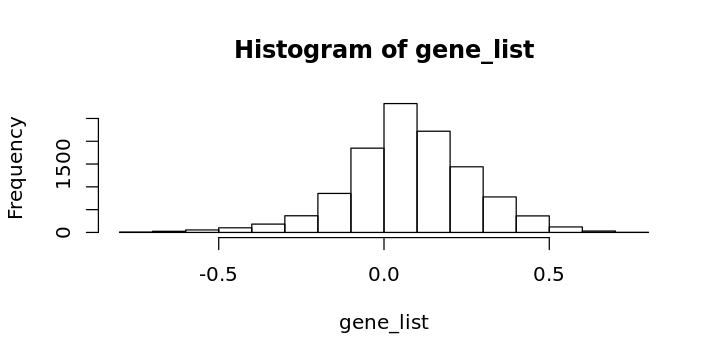

In [211]:
########### cluster 3
gene_list = df_mat[,"cluster3"]
names(gene_list) = rownames(df_mat)
options(repr.plot.width = 6, repr.plot.height = 3)
hist(gene_list)

In [212]:
genes_3_pos = gene_list[gene_list>0.5]
genes_3_neg = gene_list[gene_list<(-0.5)]
c(length(genes_3_pos), length(genes_3_neg))

[1] 156  90

In [213]:
genes_3_pos = genes_3_pos[order(genes_3_pos, decreasing = T)]
genes_3_neg = genes_3_neg[order(genes_3_neg)]

In [215]:
cat(noquote(gsub(".*_","",names(genes_3_pos))))

POLR3G LECT1 VSNL1 TERF1 THY1 NPM1 PTMA SFRP2 USP44 PHC1 SCG3 HSPD1 NME1 CYP2S1 HSPE1 PDPN TRBC2 CKMT1B SOX2 ZDHHC22 PHC1P1 GLB1L3 MT1X LCK CAMKV VASH2 LDHB CLU CKMT1A C1QBP MAD2L2 CLDN10 ERVMER34-1 ZFP42 FAM46B FABP5 FAM64A B3GALT1 SERBP1 RARRES2 RRM2 COTL1 NOP16 HAPLN3 SLIRP SLC7A8 PEBP1 ZSCAN10 DPPA4 PAICS OLFML3 NANOG SPP1 IDO1 TUBA4A ADD2 RAN GGCT GDPD2 EEF1E1 SLC2A1 SEMA6A PAK1IP1 RASGRP2 MCM3 CDH1 HPRT1 NMRK2 TMX1 L1TD1 PTPRZ1 TOMM5 PCNA NASP C9orf135 HSPA9 MCM4 CYCS VAT1L SNRPD1 GPR160 GPC3 PMEL ADM SCG5 TMEM125 TKT RSL1D1 BTBD17 PMAIP1 RAMP2 PDGFA SLC29A1 RPL22L1 DNMT3B DCAF13 SSBP1 CYB5A MCM7 PYCARD GPATCH4 BUB3 HSP90AB1 EXOSC5 SLC1A5 CDCA7L GMNN PPAP2B CENPU KPNA2 UGP2 HMGN5 ADSL SKA3 PHGDH DEK SMPDL3B UBE2L6 CMTM7 SNRPB PSMB10 BCAT1 TSR1 SPIB IMP3 GINS2 CLDN4 GRIA4 TIMM8A DPYSL2 DSCC1 CDH3 FARSB LYAR HSPA8 OIP5 CDYL H2AFZ SYT6 TIMM13 TRIML2 ZWINT BUB1B CRIP3 PROM1 JADE1 NCL CDCA5 CENPF NOLC1 RRS1 ALPL PLP1 CSRP2 AP1M2 SCNN1A

In [214]:
cat(noquote(gsub(".*_","",names(genes_3_neg))))

FGF17 CER1 APOL6 RHOBTB3 CDH2 CCDC81 GATA6 BEST3 EOMES SERPINB9 LEPREL1 IFITM1 CNTNAP2 FREM1 APOBEC3G POU2AF1 CYP26A1 SOX17 MAGEB17 SERHL2 ROR2 TRMT44 DUSP4 GSC ZNF571 ACOX3 CFLAR LHX1 ENPP7P8 KLF8 PRDM1 COL5A2 ADAM19 TMSB10 SEMA3E MCF2L2 TDRD7 ARL4D DLC1 ST8SIA4 MGST2 PCDH10 CPE GATM VAMP8 AGL CYP27A1 NFKBIA H2AFY2 OTX2 C1orf61 LAPTM4B LRIG3 ITGA5 PLXNA2 PLSCR1 GYPB BTG2 CCKBR GATA4 CAMK2D DIO3 BNIP3 B4GALT4 SLCO2A1 PKM DYNC1I1 APLP2 COLEC12 HRG HAS2 EPSTI1 OVCH2 CD99 S1PR3 APOBEC3F COL6A1 VIM KCNK12 PITX2 MAGED1 BNIP3P1 MDK H1F0 DDAH2 COL6A2 WBP5 TTC3 LINC00888 GPSM2

In [1]:
library(gprofiler2)

In [2]:
gostres = gost(genes_3_pos)

ERROR: Error in gost(genes_3_pos): object 'genes_3_pos' not found
